<h2>Desafio 3 - Machine Learning</h2>

<h4>Objetivo</h4>
Construir un modelo de clasificación (Aprendizaje supervisado> clasificación) a partir de un dataset seleccionado.

<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
<h3>Parte II - Clasificación

<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Exploración de palabras representativas](#section_words)

[Distribución de unigramas y bigramas con mayor aparición](#section_unigrams)

[Nubes de palabras](#section_wordcloud)

[Encoder de targets](#section_ordinalEncoder)

[División de sets de entrenamiento y testeo](#section_train_test_split)

[Primera prueba de clasificación](#section_clf_1)

[Pipeline y GridSearch](#section_clf_pipeline)

$\hspace{.5cm}$[1. Logistic Regression](#section_logreg)

$\hspace{.5cm}$[2. Mulyinomial NB](#section_multiNB)


<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import unidecode
from nltk.corpus import stopwords 
stop_words = stopwords.words('english');

from wordcloud import WordCloud, STOPWORDS

In [4]:
pd.set_option('display.max_columns', 100) # Para mostrar todas las columnas
# pd.set_option('display.max_rows', 100) # Para mostrar todas las filas

<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [1]:
import os

In [5]:
news = []
for dirname, _, filenames in os.walk('Data/news'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename), index_col = None, header = 0)
        row, cols = df.shape
        news.append(df)
        
data = pd.concat(news, axis=0, ignore_index=True)

Data/news/inshort_news_data-5.csv
Data/news/inshort_news_data-4.csv
Data/news/inshort_news_data-6.csv
Data/news/inshort_news_data-7.csv
Data/news/inshort_news_data-3.csv
Data/news/inshort_news_data-2.csv
Data/news/inshort_news_data-1.csv


In [6]:
data.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,"After Musk tweets 'Use Signal', unrelated stoc...",After Elon Musk endorsed encrypted messaging a...,technology
1,1,Donald Trump permanently banned from Twitter,Twitter has permanently banned US President Do...,technology
2,2,Man finds father's image on Google Earth 7 yea...,"A man in Japan found an image of his father, w...",technology
3,3,Bad sign: Mexican Prez after Trump's social me...,Following the suspension of US President Donal...,technology
4,4,Signal app registration system crashes after M...,Private encrypted messaging app Signal tweeted...,technology


In [8]:
data.isnull().sum()

Unnamed: 0       0
news_headline    0
news_article     0
news_category    0
dtype: int64

In [9]:
data = data.drop('Unnamed: 0', axis = 1)

In [10]:
data.columns

Index(['news_headline', 'news_article', 'news_category'], dtype='object')

In [71]:
news_counts = data.news_category.value_counts()

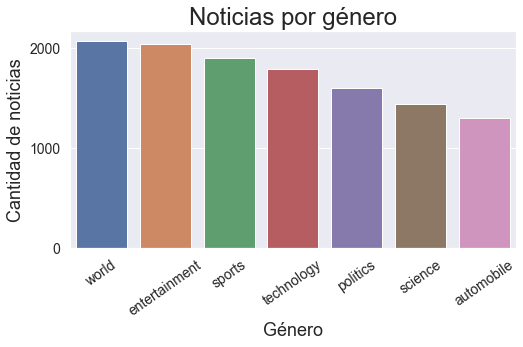

In [73]:
sns.set(font_scale = 2)
plt.figure(figsize=(8,4))

ax= sns.barplot(news_counts.index, news_counts.values)

plt.title("Noticias por género", fontsize=24)
plt.ylabel('Cantidad de noticias', fontsize=18)
plt.xlabel('Género', fontsize=18)
plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=14)

# #adding the text labels
# rects = ax.patches
# labels = data.iloc[:,2:].sum().values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

<a id="section_words"></a>
<h3>Exploración de palabras representativas por género</h3>

[volver a TOC](#section_toc)

In [12]:
import unidecode
import re

def clean_text(t):
    t_lower_no_accents=unidecode.unidecode(t.lower()); # sacamos acentos y llevamos a minuscula
    t_lower_no_accents_no_punkt=re.sub(r'([^\s\w]|_)+','',t_lower_no_accents); # quitamos signos de puntuacion usando una regex que reemplaza todo lo q no sean espacios o palabras por un string vacio
    return t_lower_no_accents_no_punkt

In [13]:
data['news_article'] = data['news_article'].apply(clean_text)

In [ ]:
# stop_words.extend(list(STOPWORDS))

In [ ]:
# stop_words = list(set(stop_words))

In [29]:
stop_words.extend(['said', 'im'])
stop_words.extend(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])

In [30]:
vectorizer=CountVectorizer(stop_words=stop_words)

In [31]:
clases = data['news_category'].unique()
words = []

for clase in clases:
    X=vectorizer.fit_transform(data[data['news_category']==clase]['news_article'])
    counts=X.sum(axis=0)
    counts=np.array(counts)
    
    indices=np.argsort(counts)
    valores=np.sort(counts)
    indices=indices[0][::-1]
    valores=valores[0][::-1]
    terms=np.array(vectorizer.get_feature_names())

    print('\n Clase ', clase)
    print(terms[indices[:30]])
    


 Clase  technology
['us' 'compani' 'facebook' 'report' 'user' 'ad' 'googl' 'app' 'ceo' 'appl'
 'use' 'india' 'twitter' 'new' 'year' 'billion' 'govern' 'tesla'
 'platform' 'account' 'whatsapp' 'million' 'amazon' 'tweet' 'trump'
 'presid' 'share' 'musk' 'data' 'first']

 Clase  sports
['india' 'test' 'australia' 'team' 'ad' 'cricket' 'captain' 'match'
 'first' 'play' 'seri' 'run' 'koh' 'score' 'former' 'day' 'player' 'bat'
 'win' 'dure' 'virat' 'second' 'batsman' 'ball' 'ipl' 'took' 'odi'
 'indian' 'smith' 'wrote']

 Clase  world
['us' 'vaccin' 'ad' 'presid' 'covid19' 'trump' 'countri' 'peopl' 'report'
 'china' 'coronavirus' 'first' 'biden' 'donald' 'year' 'new' 'state' 'uk'
 'govern' 'minist' 'india' 'use' 'case' 'would' 'world' 'last' 'offici'
 'nation' 'joe' 'health']

 Clase  politics
['bjp' 'leader' 'parti' 'congress' 'ad' 'minist' 'farmer' 'state' 'elect'
 'govern' 'cm' 'chief' 'bengal' 'peopl' 'delhi' 'west' 'presid' 'protest'
 'law' 'alleg' 'assembl' 'singh' 'poll' 'modi' 'tmc' 

<a id="section_wordcloud"></a>
<h3>Nubes de palabras</h3>

[volver a TOC](#section_toc)

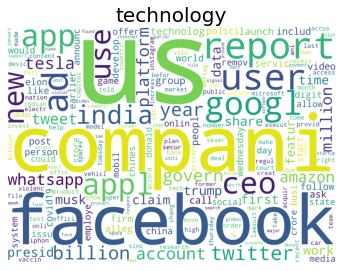

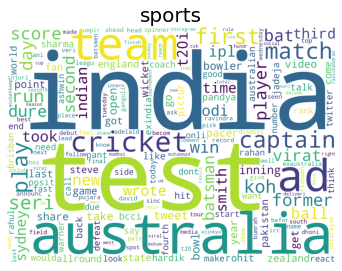

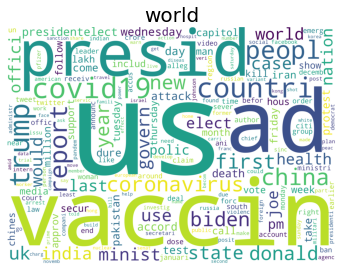

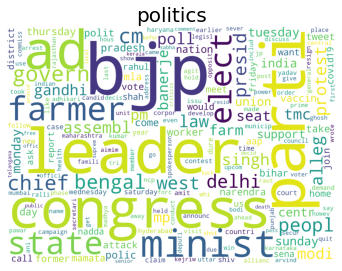

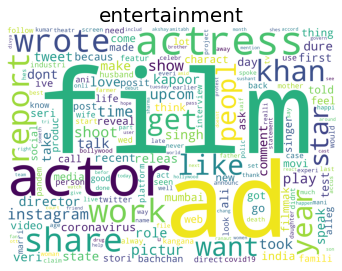

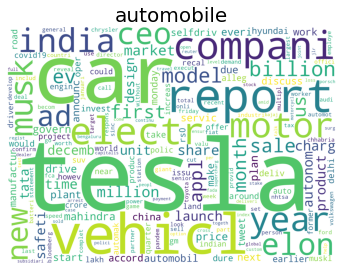

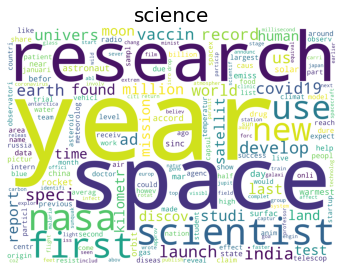

In [32]:
for clase in clases:
    plt.figure(figsize=(20,12.5))
    subset = data[data['news_category']==clase]
    text = subset['news_article'].values
    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      collocations=False,
                      width=2500,
                      height=1800).generate(" ".join(text))
    
    plt.subplot(2, 3, 1)
    plt.axis('off')
    plt.title(clase,fontsize=20)
    plt.imshow(cloud)



<a id="section_unigrams"></a>
<h3>Distribución de unigramas y bigramas con mayor aparicicón</h3>

[volver a TOC](#section_toc)

<a id="section_unigramas"></a>
<h4>Unigramas</h4>

[volver a TOC](#section_toc)

In [39]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



In [62]:
common_words = get_top_n_words(data['news_article'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['unigrams' , 'count'])



ad 3636
india 2785
us 2286
year 2035
report 2016
test 1819
first 1733
new 1444
peopl 1383
tesla 1344
state 1288
film 1258
covid19 1242
vaccin 1190
presid 1174
australia 1160
time 1154
govern 1116
use 1115
compani 1108


In [63]:
data_unigrams = df1.groupby('unigrams').sum()['count'].sort_values(ascending=False)
    

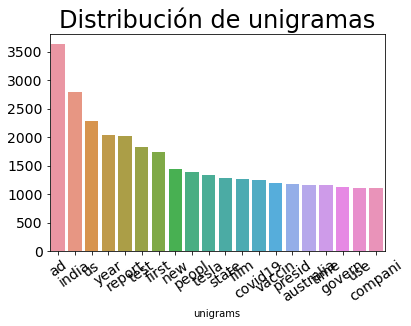

In [69]:
ax= sns.barplot(data_unigrams.index, data_unigrams.values)

plt.title("Distribución de unigramas", fontsize=24)
plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=14)


plt.show()

<a id="section_bigramas"></a>
<h4>Bigramas</h4>

[volver a TOC](#section_toc)

In [53]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [66]:
common_words = get_top_n_bigram(data['news_article'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['bigrams' , 'count'])
data_bigrams = df4.groupby('bigrams').sum()['count'].sort_values(ascending=False)

donald trump 418
presid donald 379
covid19 vaccin 352
elon musk 344
social media 331
team india 320
west bengal 305
us presid 301
last year 280
electr vehicl 256
joe biden 255
first time 242
virat koh 238
share pictur 221
ceo elon 215
test posit 214
congress leader 192
presidentelect joe 187
farm law 185
us capitol 182


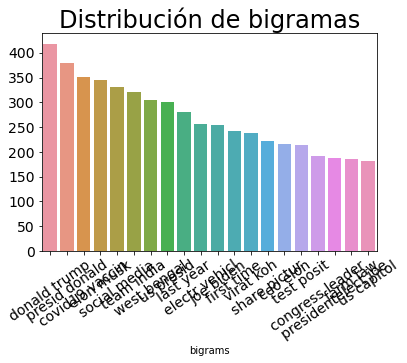

In [70]:
ax= sns.barplot(data_bigrams.index, data_bigrams.values)

plt.title("Distribución de bigramas", fontsize=24)
plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

<a id="section_ordinalEncoder"></a>
<h3>Encoder de targets</h3>

[volver a TOC](#section_toc)

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# #Cuando le paso las categorías como paramétro me tira error The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
# ord_enc = OrdinalEncoder()
# data["target_sentiment"] = ord_enc.fit_transform(data[["sentiment"]])

# data.sample(3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data['news_category'] = labelEncoder_X.fit_transform(data_set['news_category'])
data.head()

### STEMMING

In [16]:
from nltk.stem.snowball import SnowballStemmer

In [17]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence



In [18]:
data['news_article'] = data['news_article'].apply(stemming)
data.head()

,news_headline,news_article,news_category
0,"After Musk tweets 'Use Signal', unrelated stoc...",after elon musk endors encrypt messag app sign...,technology
1,Donald Trump permanently banned from Twitter,twitter has perman ban us presid donald trump ...,technology
2,Man finds father's image on Google Earth 7 yea...,a man in japan found an imag of his father who...,technology
3,Bad sign: Mexican Prez after Trump's social me...,follow the suspens of us presid donald trump s...,technology
4,Signal app registration system crashes after M...,privat encrypt messag app signal tweet that ve...,technology


<a id="section_train_test_split"></a>
<h3>División de sets de entrenamiento y testeo</h3>

[volver a TOC](#section_toc)

In [19]:
train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)
train_text = train['news_article']
test_text = test['news_article']

In [20]:
train_text.head()

8829     refer to rohit sharma play for mi against srh ...
11054    maharashtra has invit us electriccar maker tes...
10479    america 16yearold dancer char damelio the most...
10814    googl appl and 44 other us firm and organis fi...
6861     trinamool congress leader suvendu adhikari res...
Name: news_article, dtype: object

In [21]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,3),max_features=20000, stop_words=stop_words)
vectorizer.fit(train_text)

TfidfVectorizer(max_features=20000, min_df=10, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [22]:
X_train = vectorizer.transform(train_text)
X_test = vectorizer.transform(test_text)
y_train = train['news_category']
y_test = test['news_category']

<a id="section_clf_1"></a>
<h3>Primera prueba de clasificación</h3>

[volver a TOC](#section_toc)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [24]:
classifier_log = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', verbose=1, n_jobs=-1)
classifier_log.fit(X_train, y_train)
prediction = classifier_log.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Test accuracy is 0.9287678767876788


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished


In [25]:
print(classification_report(y_test, prediction, zero_division=1))

               precision    recall  f1-score   support

   automobile       0.91      0.99      0.95       385
entertainment       0.95      0.96      0.96       599
     politics       0.97      0.95      0.96       451
      science       0.94      0.96      0.95       451
       sports       0.97      0.95      0.96       583
   technology       0.88      0.82      0.85       526
        world       0.89      0.89      0.89       641

     accuracy                           0.93      3636
    macro avg       0.93      0.93      0.93      3636
 weighted avg       0.93      0.93      0.93      3636



In [26]:
classifier_log.classes_

array(['automobile', 'entertainment', 'politics', 'science', 'sports',
       'technology', 'world'], dtype=object)

In [27]:
classifier_log

LogisticRegression(multi_class='multinomial', n_jobs=-1, verbose=1)

In [33]:
print(confusion_matrix(y_test, prediction))

[[382   0   0   0   0   3   0]
 [  1 578   4   0   7   5   4]
 [  0   6 428   0   4   1  12]
 [  0   0   0 432   0   5  14]
 [  2  13   1   1 554   0  12]
 [ 37   5   4  19   1 431  29]
 [  0   8   2   8   5  46 572]]


In [35]:
conf_matrix = confusion_matrix(y_test, prediction)
conf_mat_df = pd.DataFrame(data=conf_matrix, 
                           index=classifier_log.classes_, 
                           columns=classifier_log.classes_)


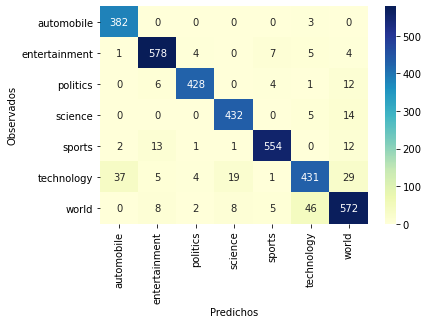

In [36]:
heatmap = sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predichos") 
plt.ylabel("Observados")
plt.show()

<a id="section_clf_pipeline"></a>
<h3>Pipeline y Gridsearch</h3>

[volver a TOC](#section_toc)

<a id="section_logreg"></a>
<h4>Logistic Regression</h4>

[volver a TOC](#section_toc)

In [ ]:
data_x = data['news_article']
data_y = data['news_category']
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(data_x, data_y, random_state=42, test_size=0.33, shuffle=True)

In [ ]:

pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)), 
                     ('log', LogisticRegression())])

parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'log__penalty': ['l2'],
              'log__C': [0.01, 0.1, 1],
              "log__class_weight": ['balanced', None],
              "log__solver" : ['sag', 'lbfgs']
}

# skf=StratifiedKFold(n_splits=3, random_state=3, shuffle=True)


In [ ]:
grid = GridSearchCV(
    pipeline, parameters, cv=3, n_jobs=2, verbose=1)
grid.fit(X_train_pipe, y_train_pipe)

In [ ]:
print("Best parameters set:")
grid.best_estimator_.steps

In [ ]:
print("Applying best classifier on test data:")
predictions = grid.best_estimator_.predict(X_test_pipe)

print(classification_report(y_test_pipe, predictions, target_names=genres))

In [ ]:
print("Accuracy = ",accuracy_score(y_test_pipe,predictions))
print("\n")

<a id="section_multiNB"></a>
<h4>Multinomial NB</h4>

[volver a TOC](#section_toc)

In [ ]:
pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', MultinomialNB(
        fit_prior=True, class_prior=None))
])
parameters1 = {
#     'tfidf__max_df': [50, 100, 200],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'tfidf__norm':['l1', 'l2']
    'clf__alpha': (1e-2, 1e-3)
}

In [ ]:
grid1 = GridSearchCV(
    pipeline1, parameters1, cv=3, n_jobs=2, verbose=1)
grid1.fit(X_train_pipe, y_train_pipe)

In [ ]:
print("Best parameters set:")
grid1.best_estimator_.steps

In [ ]:
grid1.best_score_

In [ ]:
print("Applying best classifier on test data:")
best_clf = grid1.best_estimator_
predictions1 = best_clf.predict(X_test_pipe)

print(classification_report(y_test_pipe, predictions1, target_names=genres))

In [ ]:
print("Accuracy = ",accuracy_score(y_test_pipe, predictions1))
print("\n")